In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 976s 2s/step - loss: 0.5460 - accuracy: 0.7102 - val_loss: 0.4844 - val_accuracy: 0.8116
Epoch 2/10
391/391 [==============================] - 965s 2s/step - loss: 0.4262 - accuracy: 0.8134 - val_loss: 0.6099 - val_accuracy: 0.6570
Epoch 3/10
391/391 [==============================] - 970s 2s/step - loss: 0.6106 - accuracy: 0.6676 - val_loss: 0.6890 - val_accuracy: 0.5144
Epoch 4/10
391/391 [==============================] - 971s 2s/step - loss: 0.5824 - accuracy: 0.6945 - val_loss: 0.4762 - val_accuracy: 0.7845
Epoch 5/10
391/391 [==============================] - 984s 3s/step - loss: 0.4578 - accuracy: 0.8119 - val_loss: 0.4458 - val_accuracy: 0.8161
Epoch 6/10
391/391 [==============================] - 974s 2s/step - loss: 0.2918 - accuracy: 0.8892 - val_loss: 0.3877 - val_accuracy: 0.8430
Epoch 7/10
391/391 [==============================] - 972s 2s/step - loss: 0.2344 - accuracy: 0.9128 - val_loss: 0.3748 - val_accuracy: 0.8490

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

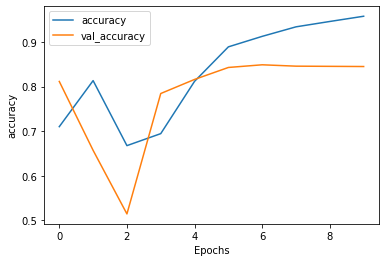

In [10]:
plot_graphs(history, 'accuracy')

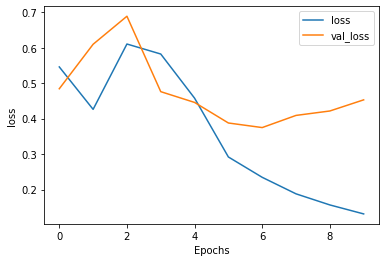

In [11]:
plot_graphs(history, 'loss')